In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import graph_tool.all as gta

import auxfunctions as aux
gta.seed_rng(42)
np.random.seed(42)

In [3]:
aux.pkl2graphml("../cmsn_dialanine.pkl")

nodos =  795
edges =  27576
Weighted: True
Directed: True
Network saved as cmsn_dialanine.graphml


In [4]:
G = gta.load_graph("cmsn_dialanine.graphml")

n = G.num_vertices()
m = G.num_edges()
print("nodos = ",n)
print("edges = ",m)

nodos =  795
edges =  27576


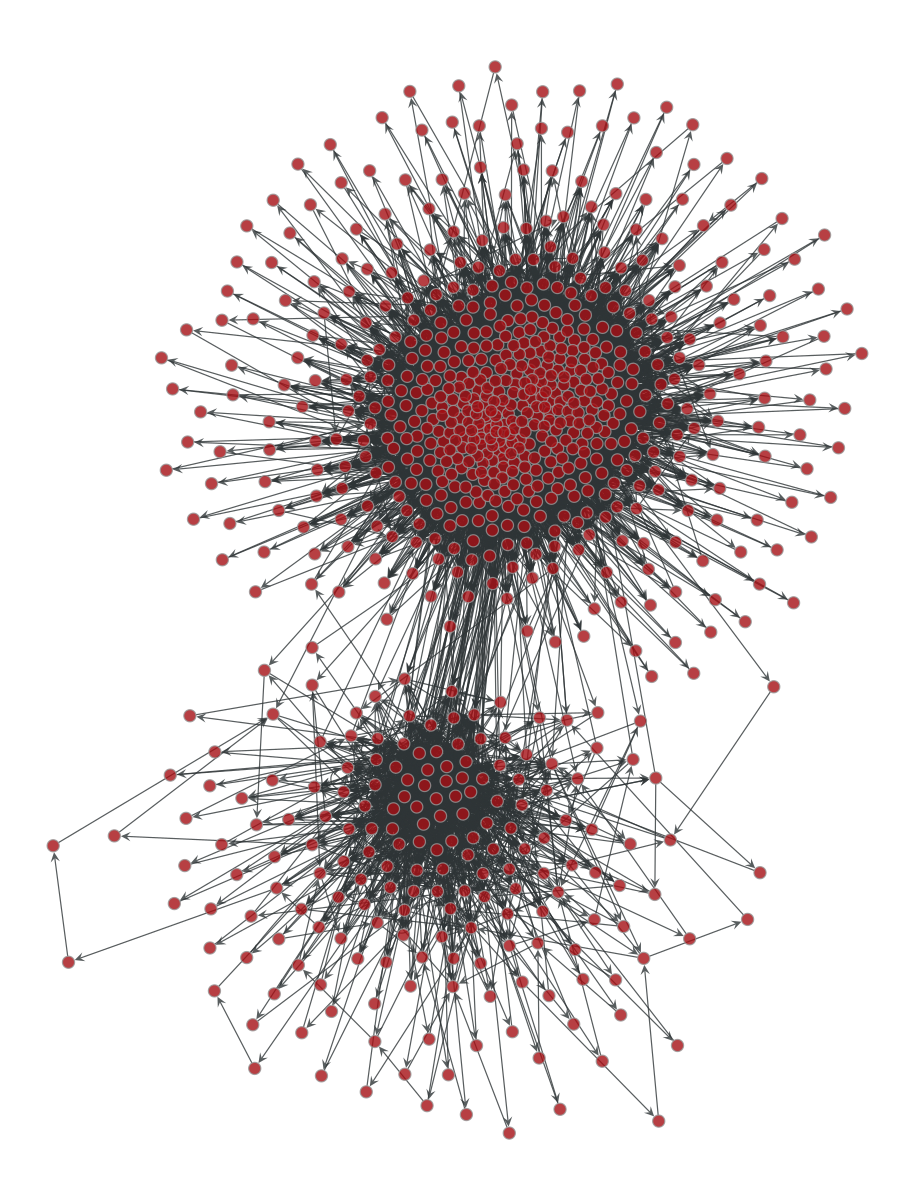

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7006346d7260, at 0x7005d6803200>

In [5]:
gta.graph_draw(G)

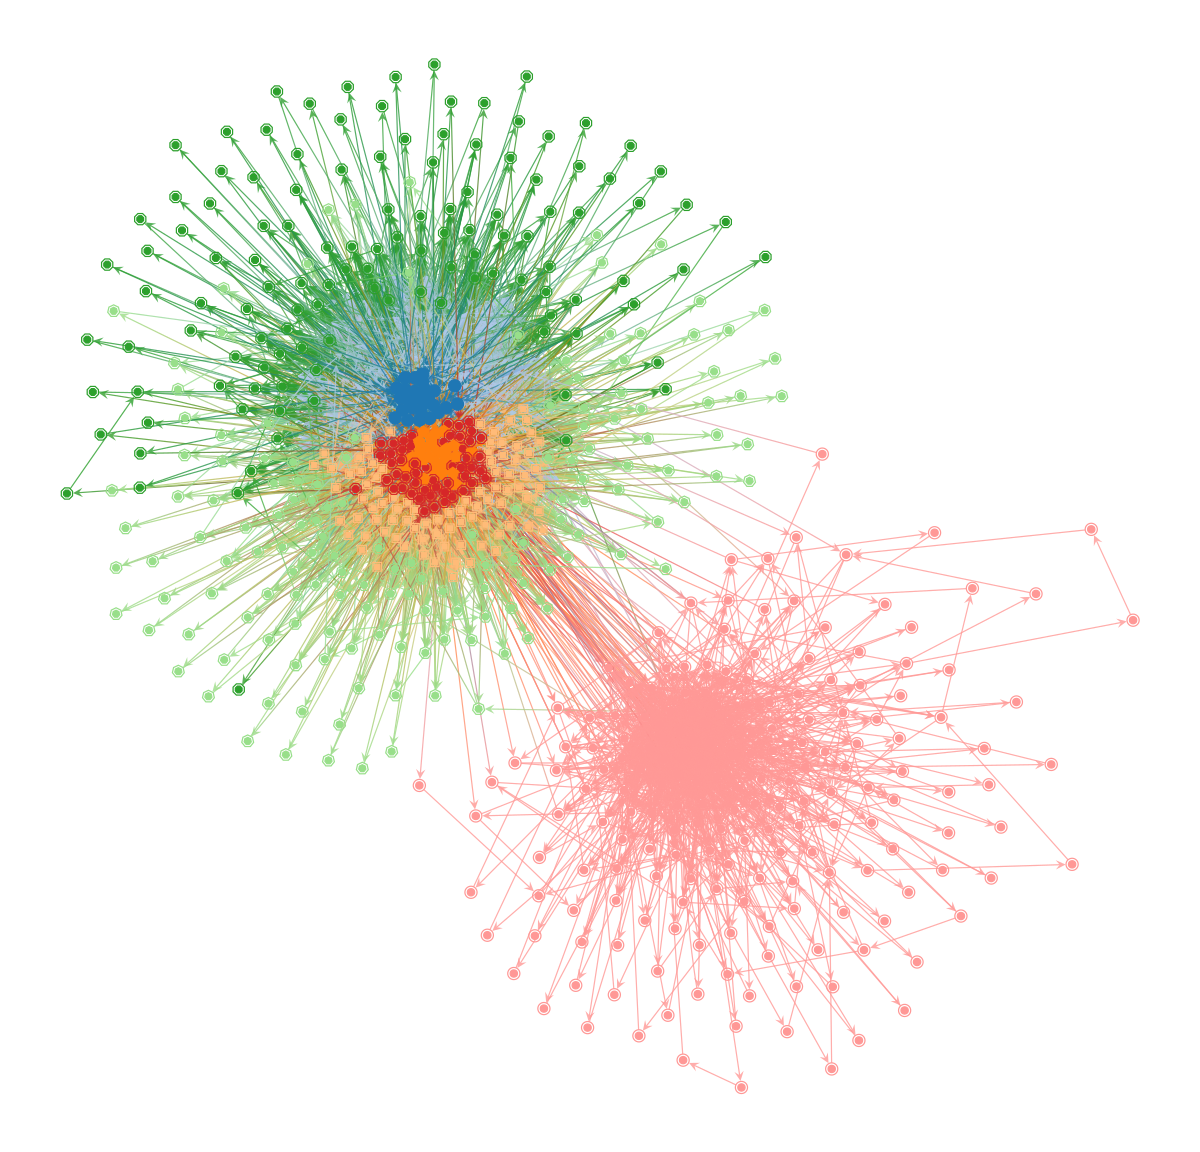

Numero de bloques (communities): 8


In [6]:
#Calculamos el SBM de la red
state = gta.minimize_blockmodel_dl(G)

# y lo dibujamos
state.draw(vertex_shape=state.get_blocks())

original_blocks = state.b.a  # asignacion de nodos
print(f"Numero de bloques (communities): {len(set(original_blocks))}")

In [7]:
# Con lo siguiente se obtiene la matriz de grupos B y las memresias de los nodos en modulos 
b = gta.contiguous_map(state.get_blocks())
stateB = state.copy(b=b)
M = stateB.get_matrix()   
B = stateB.get_nonempty_B()

Mnp = np.array(M.toarray())  # Matriz de grupos B como arreglo de Numpy
Membs = state.b.a # Membresias con un "PropertyArray" de Graph_Tool    ****

#Se calcula la respectiva Matriz de Probabilidad
P = aux.toProbMatrix(Mnp,Membs)

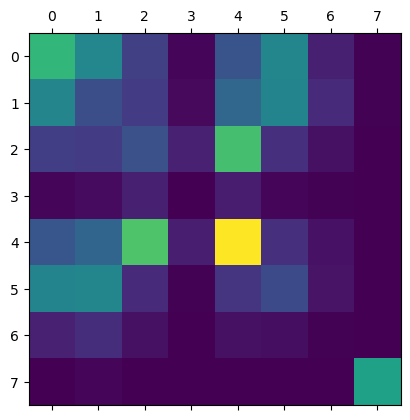

In [8]:
plt.matshow(M.todense()[:B, :B])

In [9]:
# Membs
# Mnp
aux.CuentaMembresias(Membs)

187 nodos en el modulo 424
88 nodos en el modulo 266
122 nodos en el modulo 270
26 nodos en el modulo 81
25 nodos en el modulo 148
150 nodos en el modulo 285
52 nodos en el modulo 318
145 nodos en el modulo 128
795 nodos totales


In [10]:
MembresiasDf = aux.CuentaMembresias2df(Membs)
MembresiasDf

795 nodos totales
8 Modulos


,Nodos,Modulo
0,187,1
1,150,6
2,145,8
3,122,3
4,88,2
5,52,7
6,26,4
7,25,5
